Title - Parkinsons Disease dtection

problem statement - The objective of this project is to develop a machine learning model that can accurately classify whether a patient has Parkinson's disease based on various voice measurements.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Parkinson.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


column Description

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

getting information about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Checking for null values

In [11]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Statistical Measures of the dataset

In [14]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Separating the features and target Columns in x and y columns

In [17]:
x = df.drop(columns=['name','status'], axis=1)
y = df['status']

In [19]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

checking for Outliers

In [24]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Spliting data into Trainig and testing

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [29]:
xtrain

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
53,129.336,139.867,118.604,0.00490,0.000040,0.00165,0.00183,0.00495,0.02498,0.228,...,0.01947,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491
14,152.845,163.305,75.836,0.00294,0.000020,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
119,217.116,233.481,93.978,0.00404,0.000020,0.00127,0.00128,0.00381,0.01299,0.124,...,0.01075,0.02038,0.00681,24.581,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657
19,156.405,189.398,142.822,0.00768,0.000050,0.00372,0.00399,0.01116,0.03995,0.348,...,0.04310,0.05164,0.03365,17.153,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
47,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,...,0.00860,0.01841,0.00432,26.805,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,118.747,123.723,109.836,0.00331,0.000030,0.00168,0.00171,0.00504,0.01043,0.099,...,0.00903,0.01471,0.00504,25.619,0.482296,0.723096,-6.448134,0.178713,2.034827,0.141422
137,113.166,130.270,100.673,0.00502,0.000040,0.00257,0.00312,0.00772,0.05279,0.476,...,0.04134,0.08689,0.03690,16.747,0.625362,0.708617,-4.654894,0.304107,2.672362,0.274387
72,120.080,139.710,111.208,0.00405,0.000030,0.00180,0.00220,0.00540,0.01706,0.152,...,0.01345,0.02921,0.00442,25.742,0.495954,0.762959,-5.791820,0.329066,2.205024,0.188180
140,170.368,268.796,79.543,0.00571,0.000030,0.00232,0.00269,0.00696,0.03273,0.281,...,0.02824,0.05139,0.02485,18.540,0.677131,0.685057,-4.796845,0.397749,2.963799,0.277227


Predicting data into Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [34]:
from sklearn.metrics import classification_report,accuracy_score

In [36]:
#Evaluate the model

In [38]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.87      0.90      0.88        29

    accuracy                           0.82        39
   macro avg       0.77      0.75      0.76        39
weighted avg       0.82      0.82      0.82        39



In [40]:
ac=accuracy_score(ytest,ypred)
print(ac)

0.8205128205128205


We have achieved an Average Accuracy of 84 % which is not that good. Lets see if we can increase this
accuracy by hyper tuning

HPT 

In [44]:
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [46]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.8205128205128205
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.87      0.90      0.88        29

    accuracy                           0.82        39
   macro avg       0.77      0.75      0.76        39
weighted avg       0.82      0.82      0.82        39



By using liblinear we get Accuracy of 85%

In [49]:
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [51]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.8205128205128205
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.87      0.90      0.88        29

    accuracy                           0.82        39
   macro avg       0.77      0.75      0.76        39
weighted avg       0.82      0.82      0.82        39



SVM

Predicting Data using SVM (support vector classifier)

In [55]:
from sklearn.svm import SVC

In [57]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [59]:
svm=SVC()
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.81      1.00      0.89        29

    accuracy                           0.82        39
   macro avg       0.90      0.65      0.68        39
weighted avg       0.86      0.82      0.78        39



SVC()

Using svc we get 87% Accuracy

Pipeline

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe=Pipeline(steps=[("scaler",StandardScaler()),("svm",SVC())])

In [65]:
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)

In [67]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39



In [69]:
svm=SVC(kernel="poly")
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39



SVC(kernel='poly')

Predicting data using Decision tree classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt=DecisionTreeClassifier()

In [82]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    return model

In [60]:
mymodel(dt)

0.9230769230769231
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



DecisionTreeClassifier()

By using Decision Tree we get average accuracy of 92% which is good but lets check whether we get more
accurcy by hyper tunning

Plotting Decision tree

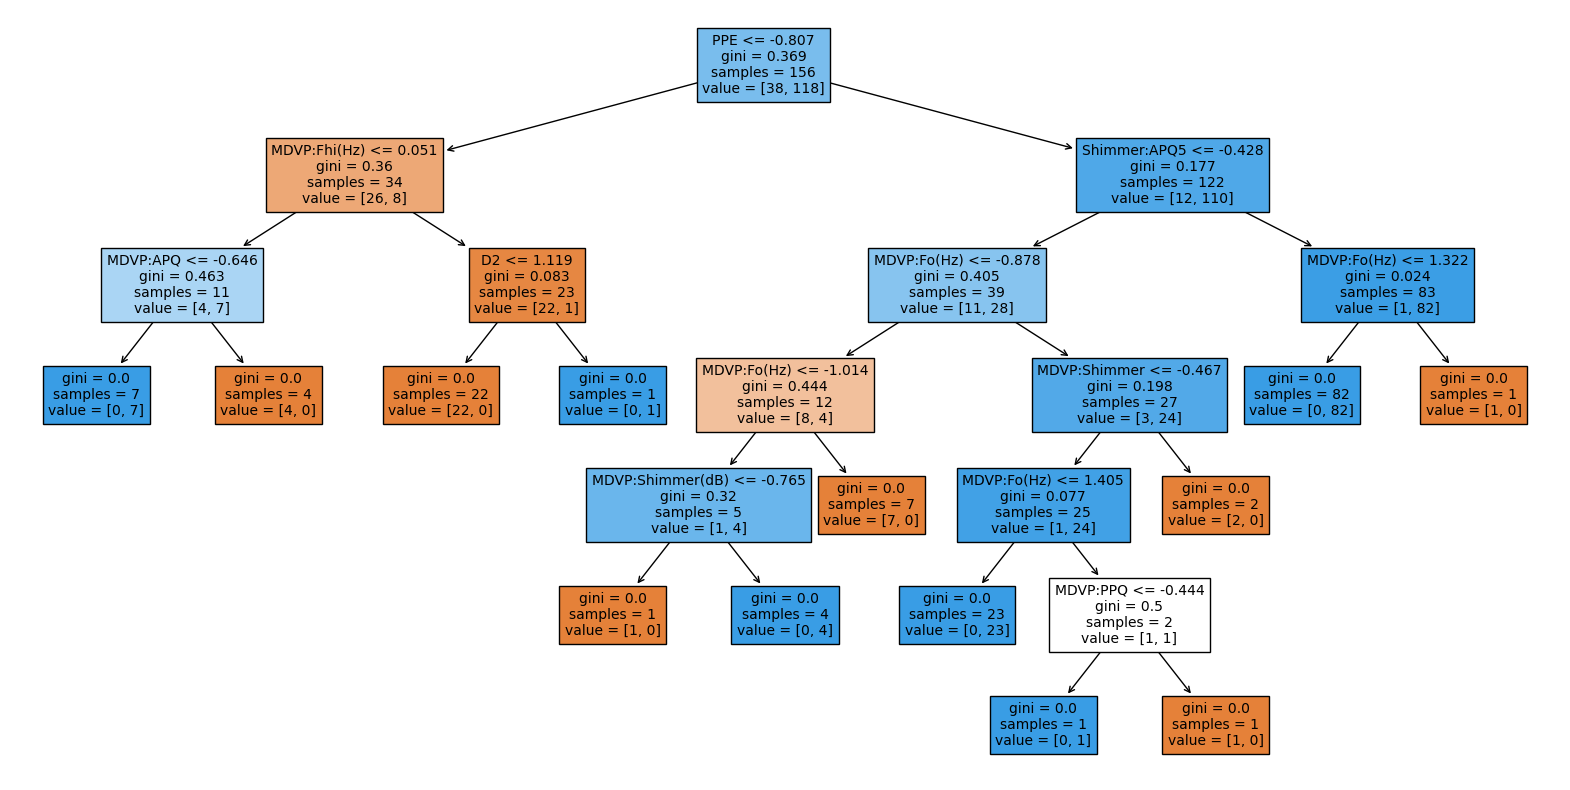

In [63]:
plt.figure(figsize=(20,10))
chart=tree.plot_tree(dt,feature_names=x.columns,filled=True,fontsize=10)
plt.savefig("tree2.jpg")

checking accuracy of train and test

In [65]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.9230769230769231


Hyper Tunning the Decision Tree

i - max_depth

In [68]:
for i in range(100,200):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    cr=classification_report(ytest,ypred)
    
    print(f"max_depth{i} accuracy{ac}")

max_depth100 accuracy0.8974358974358975
max_depth101 accuracy0.9487179487179487
max_depth102 accuracy0.9487179487179487
max_depth103 accuracy0.9230769230769231
max_depth104 accuracy0.8974358974358975
max_depth105 accuracy0.9487179487179487
max_depth106 accuracy0.8974358974358975
max_depth107 accuracy0.9230769230769231
max_depth108 accuracy0.8974358974358975
max_depth109 accuracy0.9230769230769231
max_depth110 accuracy0.9230769230769231
max_depth111 accuracy0.9230769230769231
max_depth112 accuracy0.8974358974358975
max_depth113 accuracy0.9230769230769231
max_depth114 accuracy0.9230769230769231
max_depth115 accuracy0.9230769230769231
max_depth116 accuracy0.9487179487179487
max_depth117 accuracy0.9487179487179487
max_depth118 accuracy0.9230769230769231
max_depth119 accuracy0.9230769230769231
max_depth120 accuracy0.9487179487179487
max_depth121 accuracy0.9230769230769231
max_depth122 accuracy0.8974358974358975
max_depth123 accuracy0.8974358974358975
max_depth124 accuracy0.9230769230769231


In [69]:
dt2=DecisionTreeClassifier(max_depth=100)
dt2.fit(xtrain,ytrain)
ypred=dt2.predict(xtest)
ac=accuracy_score(ytest,ypred)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39



DecisionTreeClassifier(max_depth=24)

By using Decision Tree Max Depth function we achive the accuracy of 87%

In [72]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.8717948717948718


min_samples_split

In [74]:
for i in range(150,200):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    cr=classification_report(ytest,ypred)
    
    print(f"max_depth{i} accuracy{ac}")

max_depth150 accuracy0.8461538461538461
max_depth151 accuracy0.8461538461538461
max_depth152 accuracy0.8461538461538461
max_depth153 accuracy0.8461538461538461
max_depth154 accuracy0.8461538461538461
max_depth155 accuracy0.8461538461538461
max_depth156 accuracy0.8461538461538461
max_depth157 accuracy0.7435897435897436
max_depth158 accuracy0.7435897435897436
max_depth159 accuracy0.7435897435897436
max_depth160 accuracy0.7435897435897436
max_depth161 accuracy0.7435897435897436
max_depth162 accuracy0.7435897435897436
max_depth163 accuracy0.7435897435897436
max_depth164 accuracy0.7435897435897436
max_depth165 accuracy0.7435897435897436
max_depth166 accuracy0.7435897435897436
max_depth167 accuracy0.7435897435897436
max_depth168 accuracy0.7435897435897436
max_depth169 accuracy0.7435897435897436
max_depth170 accuracy0.7435897435897436
max_depth171 accuracy0.7435897435897436
max_depth172 accuracy0.7435897435897436
max_depth173 accuracy0.7435897435897436
max_depth174 accuracy0.7435897435897436


In [75]:
dt4=DecisionTreeClassifier(min_samples_split=160)
dt4.fit(xtrain,ytrain)
ypred=dt4.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.74      1.00      0.85        29

    accuracy                           0.74        39
   macro avg       0.37      0.50      0.43        39
weighted avg       0.55      0.74      0.63        39



DecisionTreeClassifier(min_samples_split=160)

By using Decision Tree Min Sample Split function we achive the accuracy of 74%

In [78]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.7564102564102564 
 test score : 0.7435897435897436


min_samples_leaf

In [80]:
for i in range(1,50):
    dt5=DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(xtrain,ytrain)
    ypred=dt5.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    cr=classification_report(ytest,ypred)
    
    print(f"max_depth{i} accuracy{ac}")

max_depth1 accuracy0.9230769230769231
max_depth2 accuracy0.8974358974358975
max_depth3 accuracy0.9487179487179487
max_depth4 accuracy0.9230769230769231
max_depth5 accuracy0.9743589743589743
max_depth6 accuracy0.8717948717948718
max_depth7 accuracy0.9230769230769231
max_depth8 accuracy0.9230769230769231
max_depth9 accuracy0.9230769230769231
max_depth10 accuracy0.9230769230769231
max_depth11 accuracy0.9230769230769231
max_depth12 accuracy0.9230769230769231
max_depth13 accuracy0.8717948717948718
max_depth14 accuracy0.8717948717948718
max_depth15 accuracy0.8717948717948718
max_depth16 accuracy0.8461538461538461
max_depth17 accuracy0.8461538461538461
max_depth18 accuracy0.8461538461538461
max_depth19 accuracy0.8461538461538461
max_depth20 accuracy0.8461538461538461
max_depth21 accuracy0.8461538461538461
max_depth22 accuracy0.8461538461538461
max_depth23 accuracy0.8461538461538461
max_depth24 accuracy0.8461538461538461
max_depth25 accuracy0.8461538461538461
max_depth26 accuracy0.846153846153

In [81]:
dt6=DecisionTreeClassifier(min_samples_leaf=66)
dt6.fit(xtrain,ytrain)
ypred=dt6.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.74      1.00      0.85        29

    accuracy                           0.74        39
   macro avg       0.37      0.50      0.43        39
weighted avg       0.55      0.74      0.63        39



In [82]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.7564102564102564 
 test score : 0.7435897435897436


DecisionTreeClassifier(min_samples_leaf=66)

By using Decision Tree Min Sample Split function we achive the accuracy of 74%



Bagging Classifier

In [73]:
from sklearn.ensemble import BaggingClassifier,VotingClassifier

In [75]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39



using bagging classifier on Logistic regression we get accuracy of 85%

In [84]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



using bagging classifier on Decision Tree Classifier we got accuracy 92%

voting clasifier

In [88]:
model=[]
model.append(("Logreg",LogisticRegression()))
model.append(("DT",DecisionTreeClassifier()))

In [90]:
vc=VotingClassifier(estimators=model)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.96      0.83      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.86      0.82        39
weighted avg       0.88      0.85      0.85        39



using voting classifier we get 85% accurracy

Predicting model using Random forest classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



Using Random forest classifier we get accuracy 92%

Predicting data using Boosting

Adaboostclassifier

In [99]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ad=AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ypred=ad.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



using Adaboost classifier we get accuracy of 90%

Gradient Boosting

In [102]:
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



Using gradient boosting get accuracy of 97% which is quite good

XG boost classifier

In [105]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [106]:
from xgboost import XGBClassifier

In [107]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



using XGboost we get accuracy of 92%

conclusion - 

Based on the above accuracy scores, we should go ahead with
svc, decsion tree , random forest, gradient boosting or extream gradient boosting (XG
Boost).